# SARIMAX
adapted from (https://www.kaggle.com/code/sajikim/time-series-forecasting-methods-example-python/notebook)

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

warnings.simplefilter('ignore')

In [7]:
combined_states = pd.read_csv(f'../data/combined_states.csv', parse_dates=['week'], index_col='week')
combined_states_covid_2020 = combined_states.loc[:'10-2020']
combined_states_covid_2020.tail()

,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
week,,,,,,,,,,
2020-09-27,50.7,72.9,18.8,32.7,40.0,0.1,0.6,0.5,0.5,0.5
2020-10-04,52.9,68.4,20.2,31.7,51.5,0.1,0.6,0.5,0.5,0.5
2020-10-11,53.1,69.8,18.6,30.4,40.4,0.1,0.6,0.5,0.5,0.5
2020-10-18,52.2,70.3,21.9,32.7,36.3,0.1,0.6,0.5,0.5,0.5
2020-10-25,48.7,70.3,17.5,28.9,35.7,0.1,0.6,0.5,0.5,0.5


In [38]:
def SARIMAX_model(train,test):
    # fit model
    model = SARIMAX(train.drop('depression', axis=1), exog=train['mask_mandate'], order=(1, 1, 2), seasonal_order=(1,1,1,12))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, exog=test["mask_mandate"].values)
    res=pd.DataFrame({"Pred":yhat, "depression":test["depression"].values,"mask_mandate":test["mask_mandate"].values})
    return res

In [48]:
def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['depression'], order=(1, 1, 2), seasonal_order=(1,1,1,30))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "depression":test["depression"].values})
    return res

## SARIMAX with Exogenous feature

In [39]:
df_train = combined_states[['depression', 'mask_mandate']][:-15]
df_test = combined_states[['depression', 'mask_mandate']][-15:]

In [40]:
df_ret = SARIMAX_model(df_train, df_test)

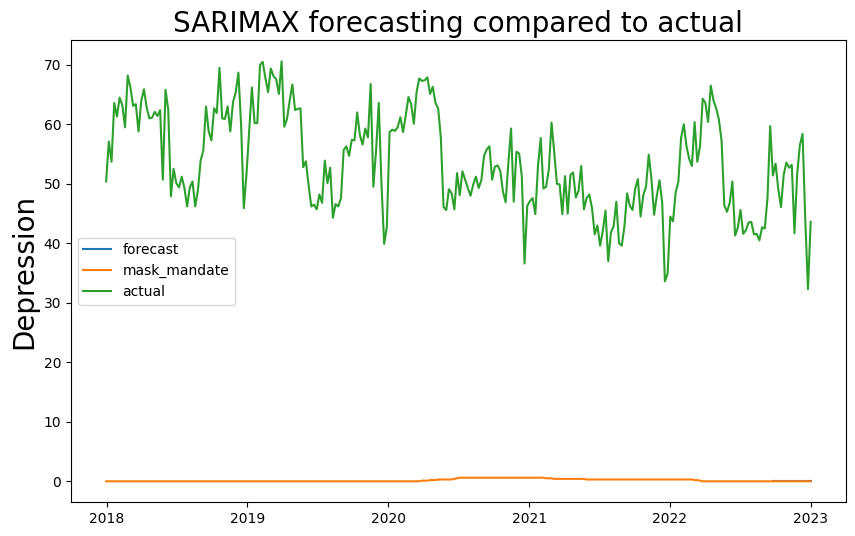

In [41]:
plt.figure(figsize = (10, 6))
plt.plot(df_ret['Pred'], label = 'forecast')
plt.plot(combined_states['mask_mandate'], label = 'mask_mandate')
plt.plot(combined_states.index, combined_states['depression'], label = 'actual')
plt.legend()
plt.title('SARIMAX forecasting compared to actual', size=20)
plt.ylabel('Depression', size=20);

The model gave to much value to exogenous feature and does not give good predictions with. I will try to remove exogenous and fit the model again.

## SARIMA without Exogenous feature

In [45]:
df_train = combined_states[['depression']][:-15]
df_test = combined_states[['depression']][-15:]

In [49]:
df_ret = SARIMA_model(df_train, df_test)

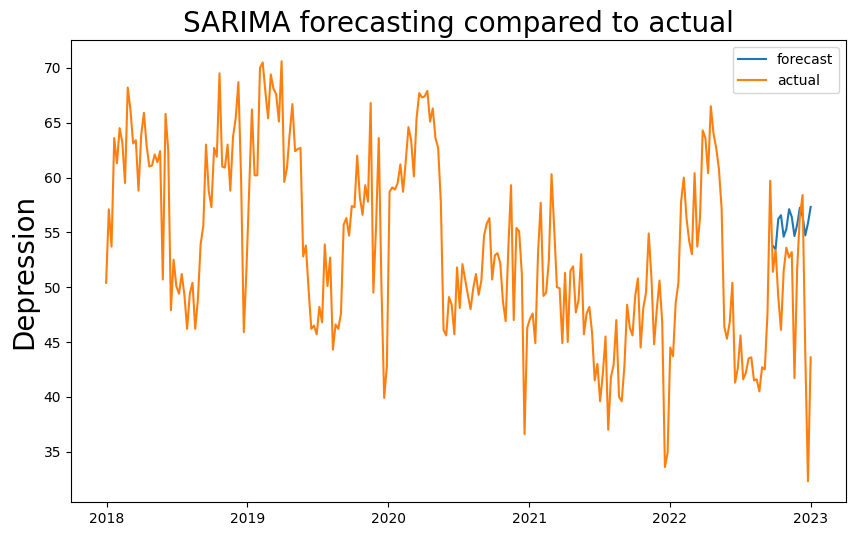

In [47]:
plt.figure(figsize = (10, 6))
plt.plot(df_ret['Pred'], label = 'forecast')
plt.plot(combined_states.index, combined_states['depression'], label = 'actual')
plt.legend()
plt.title('SARIMA forecasting compared to actual', size=20)
plt.ylabel('Depression', size=20);

SARIMA does not give good predictions on this data. I will try different forecasting model